In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [102]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import os
from fastai.tabular import *

In [164]:
df = pd.read_csv('../input/train.csv').drop('ID_code', axis=1)
test_df = pd.read_csv('../input/test.csv')
valid_idx = random.sample(list(df.index.values), int(len(df)*0.05))

In [177]:
features = [feature for feature in df.columns if 'var_' in feature]
features

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

In [166]:
data = TabularDataBunch.from_df(path='.', df=df, dep_var='target', valid_idx=valid_idx,
                                    cat_names=[], cont_names=features, procs=[FillMissing, Normalize], test_df=test_df)

In [167]:
learn = tabular_learner(data, layers=[200, 100, 50], metrics=[accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


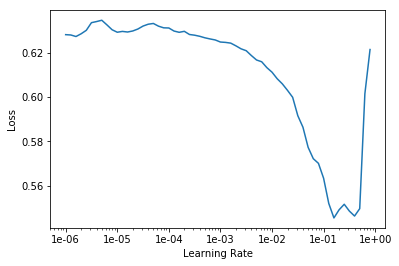

In [169]:
learn.lr_find(end_lr=1e3)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.230649,1.472772,0.914000,00:26


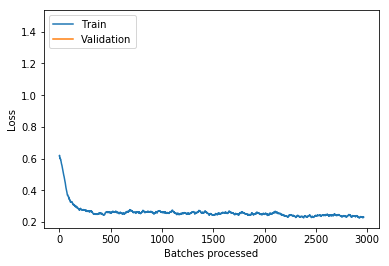

In [170]:
learn.fit_one_cycle(1, max_lr=5e-2)
learn.recorder.plot_losses()

In [171]:
test_pred, test_y = learn.get_preds(ds_type=DatasetType.Test)

In [178]:
print(test_y[0:20])
test_y.sum()

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


tensor(0)

In [180]:
valid_pred, valid_y = learn.get_preds(ds_type=DatasetType.Valid)
print(valid_y[0:20])
valid_y.sum()

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


tensor(978)